In [186]:
import pandas as pd
from pandas import DataFrame
import warnings
import math
import itertools
from pandas import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Loading the data

In [187]:
data = pd.read_csv('C:/Users/A236844/OneDrive - Standard Bank/Desktop/Time Series/AirPassengers.csv', header=0, parse_dates=[0], index_col=0, squeeze=True) # Making the Time factor an Index
data.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

In [208]:
#Checking for missing values
data.isna().sum()

0

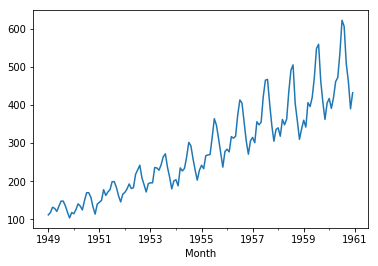

In [209]:
# Plotting the dataset
data.plot()
plt.show()

In [190]:
#We can see that the dataset has a clear trend
#This suggests that the time series is not stationary and will require differencing to make it stationary, at least a difference order of 1.

## Stationarity - mean, variance and covariance is constant over periods of time

## Auto-Correlation

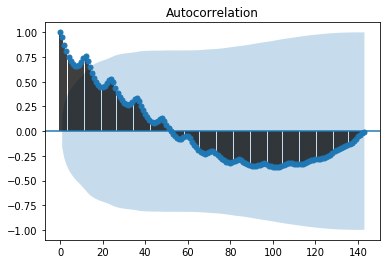

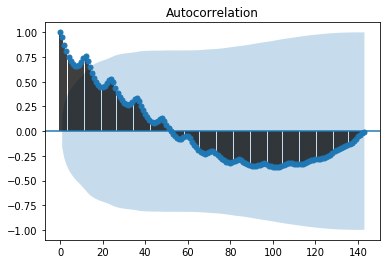

In [191]:
# Auto-Correlation Function (acf plot)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

In [192]:
# The decay is very slow, that means the data is non-stationary.

##  Converting series to Stationary

In [193]:
# The data needs to be stationary to do Time Series forecasting

In [253]:
#Taking a Difference of order 1, denoted by d, for difference, one of the ARIMA model parameters
data_diff = data.diff(periods = 1)

data_diff = data_diff[1:]     # Take from the second value till the end, first one is Null
data_diff.head()

Month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
Name: Passengers, dtype: float64

## ACF of the differenced function

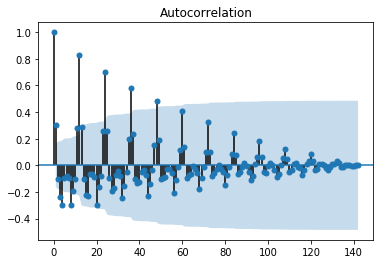

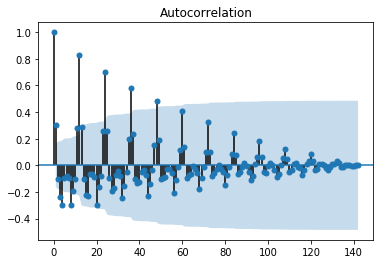

In [254]:
plot_acf(data_diff)      #Taking the difference makes in Stationary

## Removal of the trend

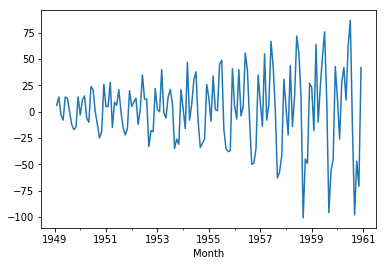

In [255]:
#Difference also got rid of the trend
data_diff.plot()            

In [256]:
#Now, the data is stationary, no trend in the data
#Now we can fit the TS data!

## ARIMA model

In [257]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [258]:
#p, d, q are the parameters for ARIMA
#p -> periods taken for Auto Regressive model
#d -> Integrated order, difference
#q _> periods in Moving Average

In [259]:
#Here, I'm removing the warnings

import warnings
warnings.filterwarnings('ignore')

#Splitting the data, 66% train, 34% test

X = data.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

history = [x for x in train]                      #History is the iteration of valuea
predictions = list()

# ARIMA Model fitting and predictions iterator
for t in range(len(test)):
	model = ARIMA(history, order=(4,1,1))          #(p,d,q), parameter tuning 
	model_fit = model.fit()
	output = model_fit.forecast()                  #instead of predict() we use the forecast() function
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]                                  
	history.append(obs)                            # history has the test values
	print('predicted=%f, expected=%f' % (yhat, obs))
    
# Getting the MAE and RMSE
error = math.sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)

print('Test RMSE: %.3f' % error)
print('Test MAE: %.3f' % mae)

predicted=262.921651, expected=306.000000
predicted=324.778312, expected=315.000000
predicted=322.550014, expected=301.000000
predicted=315.607546, expected=356.000000
predicted=374.237487, expected=348.000000
predicted=337.874627, expected=355.000000
predicted=360.357027, expected=422.000000
predicted=410.671080, expected=465.000000
predicted=438.371019, expected=467.000000
predicted=438.894609, expected=404.000000
predicted=359.263336, expected=347.000000
predicted=318.554492, expected=305.000000
predicted=291.209596, expected=336.000000
predicted=362.540842, expected=340.000000
predicted=349.695976, expected=318.000000
predicted=337.354754, expected=362.000000
predicted=390.897723, expected=348.000000
predicted=350.843712, expected=363.000000
predicted=384.511439, expected=435.000000
predicted=441.100564, expected=491.000000
predicted=478.248258, expected=505.000000
predicted=479.524935, expected=404.000000
predicted=350.196044, expected=359.000000
predicted=348.780403, expected=310

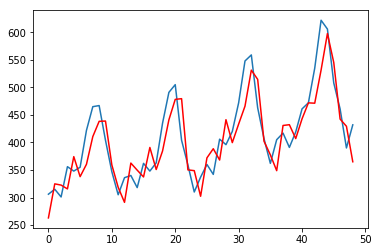

In [260]:
# 39.972
# 34.196
# Plotting the test vs predictions
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [261]:
# print summary of the ARIMA model
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  142
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -666.948
Method:                       css-mle   S.D. of innovations             26.026
Date:                Tue, 26 Nov 2019   AIC                           1347.896
Time:                        10:12:12   BIC                           1368.586
Sample:                             1   HQIC                          1356.304
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6388      0.102     25.811      0.000       2.438       2.839
ar.L1.D.y      1.0634      0.083     12.831      0.000       0.901       1.226
ar.L2.D.y     -0.4982      0.122     -4.079      0.0

## Mean Absolute Percentage Error

In [262]:
import numpy as np
from pandas import DataFrame
def mean_absolute_percentage_error(test, predictions): 
    test, predictions = np.array(test), np.array(predictions)
    return np.mean(np.abs((test - predictions) / test))*100
MAPE = mean_absolute_percentage_error(test, predictions)
Accuracy = 100-MAPE

## Accuracy

In [263]:
print("The Accuracy of the ARIMA model is: %.3f" % Accuracy+"%")

The Accuracy of the ARIMA model is: 79.759%


In [128]:
#Plotting acf for modelling
import itertools
p=d=q = range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [95]:
#AIC method to choose the best parameters
for param in pdq:
    try:
        model = ARIMA(train, order = param)
        model_fit = model.fit()
        print(param, model_fit.aic)
    except:
        continue

(0, 0, 0) 265.4245055747823
(0, 0, 1) 266.7680206910327
(0, 0, 2) 266.27913408919443
(0, 0, 3) 343.83975269625705
(0, 0, 4) nan
(0, 1, 0) 264.58994831732
(0, 1, 1) 251.59831066271911
(0, 1, 2) 252.87677486198828
(0, 2, 0) 276.44778371656366
(0, 2, 1) 258.6978524723144
(1, 0, 0) 266.35954944184465
(1, 1, 0) 254.30327946191593
(1, 1, 1) 252.67521663262994
(1, 1, 2) 253.44734002880588
(1, 1, 3) 255.17332279095876
(1, 1, 4) 258.47008858755237
(1, 2, 0) 258.9275946921514
(2, 0, 0) 265.06207266221804
(2, 1, 0) 255.81966071580962
(2, 1, 1) 254.11164959506684
(2, 1, 2) 255.27787425994342
(2, 2, 0) 258.52969052547246
(3, 0, 0) 267.00350218407857
(3, 1, 0) 253.9834464949527
(3, 1, 1) 255.03344230728985
(3, 1, 2) 253.05916148025128
(3, 1, 3) 254.89946698773207
(3, 1, 4) 256.8907402216637
(3, 2, 0) 255.57559930853733
(3, 2, 1) 248.78791517482045
(4, 0, 0) 267.76617148412
(4, 0, 3) 284.2677167849873
(4, 1, 0) 254.9997387035872
(4, 1, 1) 256.93551124863
(4, 1, 2) 254.94344407522948
(4, 1, 3) 256.597

In [106]:
import numpy as np
from pandas import DataFrame
def mean_absolute_percentage_error(test, predictions): 
    test, predictions = np.array(test), np.array(predictions)
    return np.mean(np.abs((test - predictions) / test)) * 100
mean_absolute_percentage_error(test, predictions)

24.639197809698704

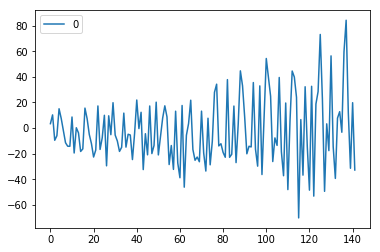

In [177]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

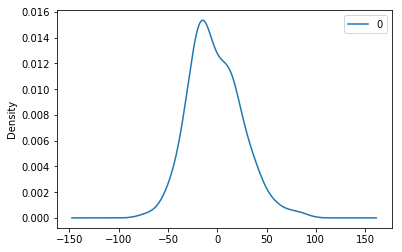

In [181]:
# First, Line plot of the residual errors, suggesting that there is little to none trend information not captured by the model.
residuals.plot(kind='kde')
pyplot.show()

In [179]:
# Next, we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.
print(residuals.describe())

                0
count  142.000000
mean    -2.156897
std     26.220944
min    -70.276788
25%    -19.552783
50%     -5.533060
75%     14.538775
max     84.161174


In [1]:
# Lastly, this is the distribution of the residual errors is displayed
## non-zero mean indicates that, there is bias in prediction